<a href="https://colab.research.google.com/github/gabriela-du/challenge02/blob/main/challenge02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [2]:
import pandas as pd

In [7]:
dados = pd.read_json('/TelecomX_Data (1).json')

In [8]:
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [22]:
# Normalizando campos aninhados
df = pd.json_normalize(dados.to_dict(orient="records"))

# Visualizar primeiras linhas
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [15]:
df_normalizado_cliente = pd.json_normalize(dados['customer'])
df_normalizado_cliente

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [16]:
df_normalizado_phone = pd.json_normalize(dados['phone'])
df_normalizado_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [17]:
df_normalizado_internet = pd.json_normalize(dados['internet'])
df_normalizado_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [18]:
df_normalizado_account = pd.json_normalize(dados['account'])
df_normalizado_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


#📊 Carga e análise

In [23]:
import numpy as np

# Estatísticas básicas das colunas numéricas
desc = df.describe().T
print(desc[['mean', '50%', 'std']])  # 50% é a mediana

                              mean   50%        std
customer.SeniorCitizen    0.162653   0.0   0.369074
customer.tenure          32.346498  29.0  24.571773
account.Charges.Monthly  64.720098  70.3  30.129572


In [26]:
print("Média gasto mensal:", df["account.Charges.Monthly"].mean())
print("Mediana gasto mensal:", df["account.Charges.Monthly"].median())
print("Desvio padrão gasto mensal:", df["account.Charges.Monthly"].std())

print("\nMédia tempo de permanência:", df["customer.tenure"].mean())
print("Mediana tempo de permanência:", df["customer.tenure"].median())
print("Desvio padrão tempo de permanência:", df["customer.tenure"].std())

Média gasto mensal: 64.72009770194028
Mediana gasto mensal: 70.3
Desvio padrão gasto mensal: 30.12957188566699

Média tempo de permanência: 32.34649786707032
Mediana tempo de permanência: 29.0
Desvio padrão tempo de permanência: 24.571772888767292


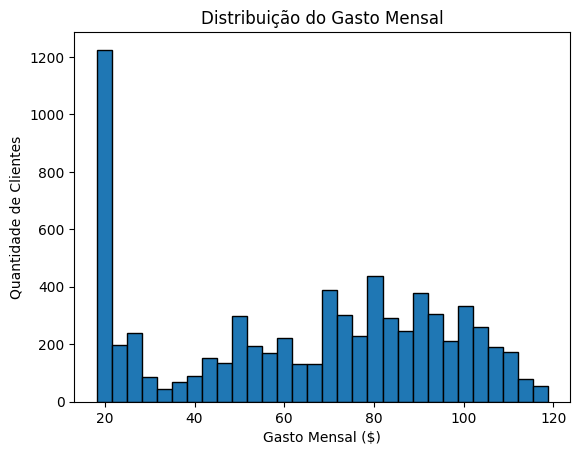

In [27]:
import matplotlib.pyplot as plt

plt.hist(df["account.Charges.Monthly"], bins=30, edgecolor='black')
plt.title("Distribuição do Gasto Mensal")
plt.xlabel("Gasto Mensal ($)")
plt.ylabel("Quantidade de Clientes")
plt.show()

In [28]:
import matplotlib.pyplot as plt

# Contagem de clientes por Churn
churn_counts = df["Churn"].value_counts()

print(churn_counts)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


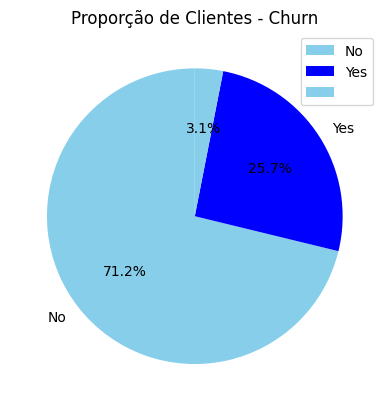

In [34]:
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'blue'],
                  startangle=90, legend=True)
plt.ylabel("")
plt.title("Proporção de Clientes - Churn")
plt.show()

In [31]:
#churn por gênero
print(pd.crosstab(df['customer.gender'], df['Churn'], normalize='index') * 100)

# churn por tipo de contrato
print(pd.crosstab(df['account.Contract'], df['Churn'], normalize='index') * 100)

# churn por método de pagamento
print(pd.crosstab(df['account.PaymentMethod'], df['Churn'], normalize='index') * 100)

Churn                             No        Yes
customer.gender                                
Female           2.895323  70.963252  26.141425
Male             3.265306  71.428571  25.306122
Churn                              No        Yes
account.Contract                                
Month-to-month    3.245943  55.430712  41.323346
One year          3.028308  86.043450  10.928242
Two year          2.753873  94.492255   2.753873
Churn                                       No        Yes
account.PaymentMethod                                    
Bank transfer (automatic)  2.831970  80.931403  16.236627
Credit card (automatic)    2.933673  82.270408  14.795918
Electronic check           3.271984  52.924335  43.803681
Mailed check               3.183183  78.318318  18.498498


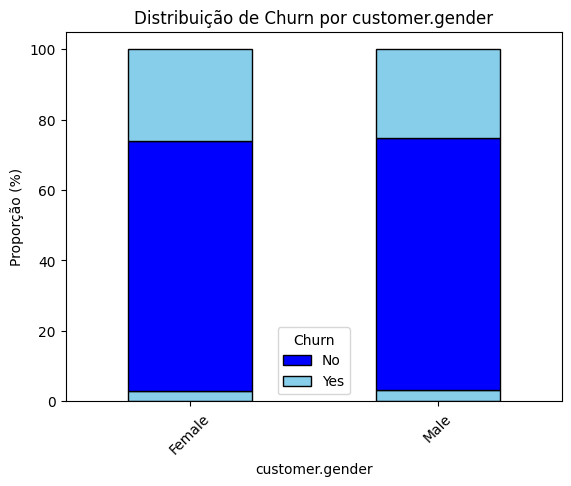

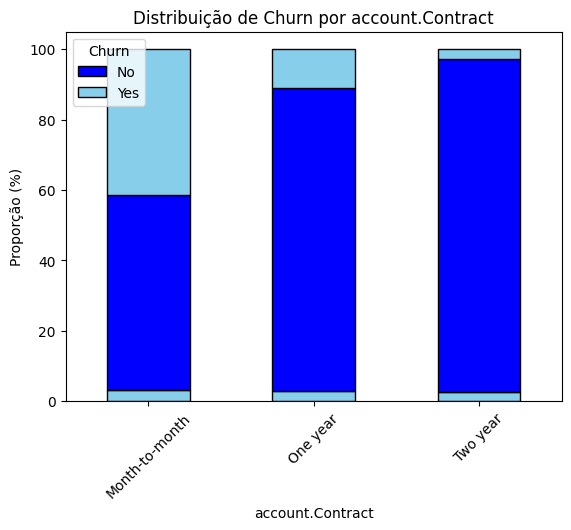

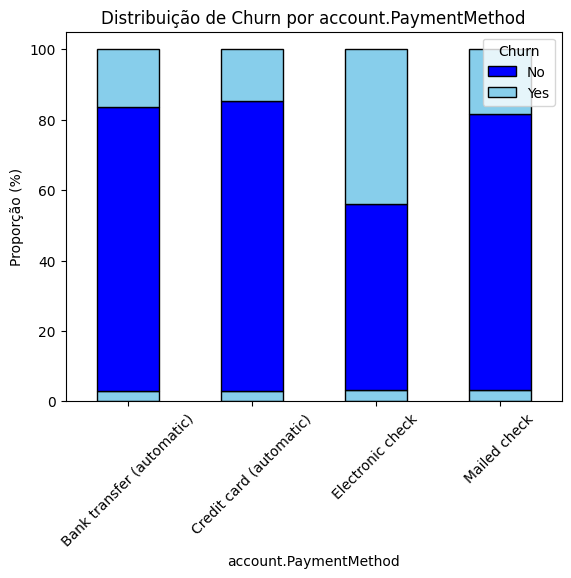

In [33]:
#Gráfico
def churn_plot(col):
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, color=['skyblue','blue'], edgecolor="black")
    plt.title(f"Distribuição de Churn por {col}")
    plt.ylabel("Proporção (%)")
    plt.xlabel(col)
    plt.legend(title="Churn")
    plt.xticks(rotation=45)
    plt.show()

# Exemplos:
churn_plot('customer.gender')
churn_plot('account.Contract')
churn_plot('account.PaymentMethod')

In [35]:
# Estatísticas por churn
num_vars = ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total"]

for col in num_vars:
    print(f"\n📊 {col}")
    print(df.groupby("Churn")[col].describe())


📊 customer.tenure
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
        224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

📊 account.Charges.Monthly
        count       mean        std    min     25%     50%      75%     max
Churn                                                                      
        224.0  63.412277  31.388712  18.75  28.425  69.100  90.4125  115.55
No     5174.0  61.265124  31.092648  18.25  25.100  64.425  88.4000  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.150  79.650  94.2000  118.35

📊 account.Charges.Total
      count unique    top freq
Churn                         
        224    223  19.55    2
No     5174   4966          11
Yes    1869   1732   20.2    6


In [38]:
import seaborn as sns

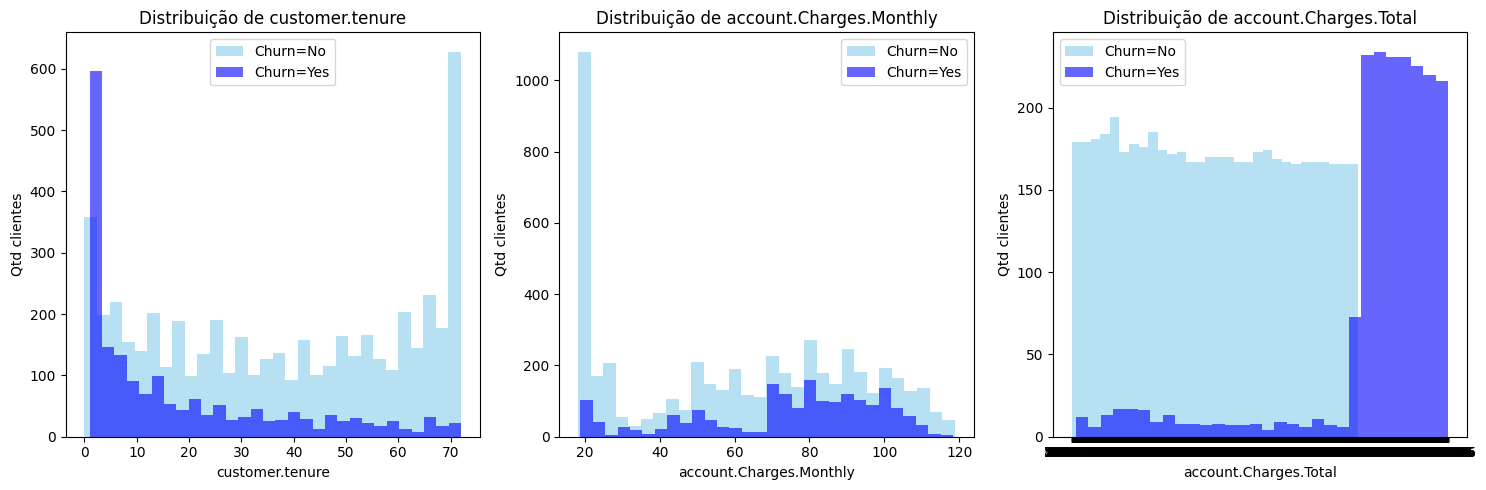

In [40]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_vars, 1):
    plt.subplot(1, 3, i)
    for churn_value, color in zip(["No", "Yes"], ["skyblue", "blue"]):
        subset = df[df["Churn"] == churn_value]
        plt.hist(subset[col], bins=30, alpha=0.6, label=f"Churn={churn_value}", color=color)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Qtd clientes")
    plt.legend()

plt.tight_layout()
plt.show()

#📄Relatorio Final

#**Relatório de Análise de Evasão de Clientes (Churn)**
#**1. Introdução**

O objetivo desta análise é compreender os fatores associados à evasão de clientes (Churn) em uma empresa de telecomunicações.
A evasão de clientes é um problema crítico, pois impacta diretamente na receita e na sustentabilidade do negócio.
Por meio da exploração dos dados fornecidos em formato JSON, buscamos identificar padrões de comportamento e variáveis que influenciam a permanência ou saída dos clientes.

# **2. Limpeza e Tratamento de Dados**

Os dados foram importados a partir de um arquivo JSON (TelecomX_Data.json).

Utilizamos pandas.json_normalize para transformar os campos aninhados em colunas planas, facilitando a análise.

Variáveis numéricas e categóricas foram organizadas em colunas como:

Numéricas: customer.tenure, account.Charges.Monthly, account.Charges.Total

Categóricas: customer.gender, account.Contract, account.PaymentMethod

Foram realizadas verificações de consistência e tratamento para lidar com formatos de variáveis.

# **3. Análise Exploratória de Dados**

**3.1. Distribuição Geral de Churn**

Contagem de clientes:

1. Não evadiram: 5.174

2. Evadiram: 1.869

**3.2. Variáveis Numéricas**

Tempo de permanência (tenure):

1. Média clientes ativos: 37,6 meses

2. Média clientes evadidos: 18 meses

Gasto mensal:

Clientes evadidos apresentam gasto médio maior (74,4) em comparação aos que ficaram (61,2).

Gasto total:

Clientes evadidos acumulam valores menores, pois tendem a sair antes.

**3.3. Variáveis Categóricas**

Churn por gênero: distribuição equilibrada.

Churn por contrato:

1. Month-to-month → 41% evasão

2. One year → 11% evasão

3. Two year → apenas 2,7% evasão

Churn por método de pagamento:

1. Electronic check → maior evasão (43,8%)

2. Cartão automático / débito automático → menor evasão (≈15%).


# **4. Conclusões e Insights**

Clientes de contrato mensal e que usam Electronic check apresentam maior risco de evasão.

Tempo de permanência é um indicador chave: clientes com baixa fidelidade (menor que 12 meses) têm maior probabilidade de cancelar.

Clientes com gasto mensal elevado estão mais propensos a sair, possivelmente por perceberem o serviço como caro.

O gasto total acumulado dos evadidos é menor, reforçando que o cancelamento ocorre de forma precoce.

# **Recomendações Estratégicas**

1. Oferecer incentivos para migração de contratos mensais para anuais/bianuais, reduzindo a probabilidade de cancelamento.

2. Revisar preços para clientes de alto gasto mensal, oferecendo pacotes personalizados ou descontos para evitar evasão.

3. Aprimorar a experiência de pagamento digital: clientes que usam “Electronic check” possuem maior churn; estimular meios automáticos de pagamento pode aumentar a retenção.

4. Programas de fidelidade voltados para clientes novos, já que o risco de evasão é maior nos primeiros meses de contrato.

5. Monitoramento contínuo com dashboards de churn, permitindo ação rápida quando padrões de risco surgirem.
